In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X :  (100, 2)
dimensions de y :  (100, 1)


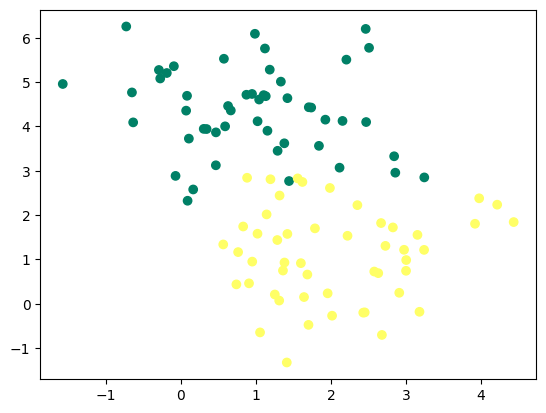

In [20]:
X, y =make_blobs(n_samples= 100, n_features= 2, centers= 2, random_state= 0)
y=y.reshape((y.shape[0], 1))

print("dimensions de X : ", X.shape)
print("dimensions de y : ", y.shape)


plt.scatter(X[:, 0], X[ : , 1], c=y, cmap= "summer")

In [21]:
#Initialisation
import numpy as np
def initialisation(X):
    W=np.random.randn(X.shape[1], 1)
    b=np.random.randn(1)
    return (W,b)


In [22]:
W, b = initialisation(X)
print(W.shape)
print(b.shape)
b


(2, 1)
(1,)


array([-0.45243908])

In [23]:
def model(X, W, b):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A

In [24]:
A = model(X, W, b)
A.shape

(100, 1)

In [25]:
def log_loss(A, y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [26]:
def gradients(A, X, y):
    dW = 1/len(y)*np.dot(X.T, A-y)
    db = 1/len(y)*sum(A-y)
    return (dW, db)


In [27]:
dW, db =gradients(A, X, y)
db

array([-0.46416872])

In [28]:
def udapte(dW, db, W, b, learning_rate):
    W=W-learning_rate*dW
    b =b-learning_rate*db
    return (W, b)

In [29]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

Programmation d'un neurone

In [30]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    #initialisation
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        #Loss = log_loss(A, y)
        dW, db = gradients(A, X, y)
        W, b = udapte(dW, db, W, b, learning_rate)

    
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
        
        

    plt.plot(Loss)
    plt.show()

    return (W, b)


0.9


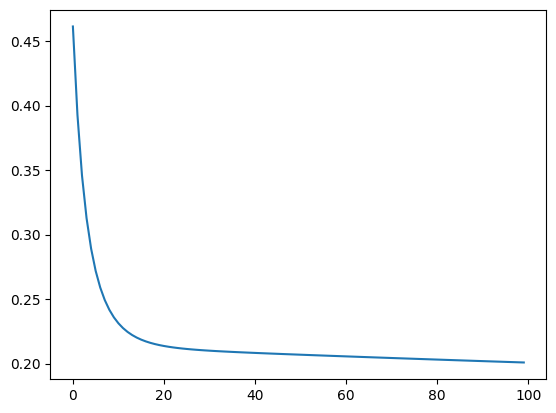

(array([[ 1.48340365],
        [-1.41179371]]),
 array([1.14928549]))

In [31]:
artificial_neuron(X,y)

array([False])

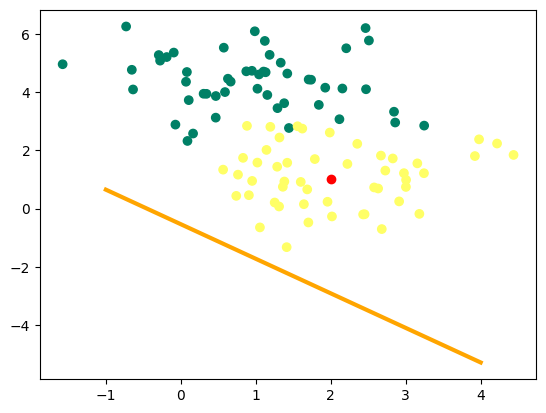

In [32]:
new_plant = np.array([2,1])

x_0=np.linspace(-1, 4, 100)
x_1= (-W[0]*x_0-b)/W[1]

plt.scatter(X[: ,0], X[:, 1], c=y, cmap= "summer")
plt.scatter(new_plant[0], new_plant[1], c="r")
plt.plot(x_0, x_1, c="orange", lw=3)


predict(new_plant, W, b)

Polynomial_features

In [33]:
import numpy as np
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import PolynomialFeatures

print("sklearn version, : ", sklearn.__version__)

sklearn version, :  1.5.2


In [34]:
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [35]:
X = df[["mpg","cylinders"]]
X

,mpg,cylinders
0,18.0,8
1,15.0,8
2,18.0,8
3,16.0,8
4,17.0,8
...,...,...
393,27.0,4
394,44.0,4
395,32.0,4
396,28.0,4


In [36]:
polynomial_transform = PolynomialFeatures(degree=2)
polynomial_transform.fit(X)

polynomial_transform.transform(X).astype(int).shape

(398, 6)

In [37]:
X_2 = df[["mpg","cylinders","acceleration","model_year"]]
X_2

,mpg,cylinders,acceleration,model_year
0,18.0,8,12.0,70
1,15.0,8,11.5,70
2,18.0,8,11.0,70
3,16.0,8,12.0,70
4,17.0,8,10.5,70
...,...,...,...,...
393,27.0,4,15.6,82
394,44.0,4,24.6,82
395,32.0,4,11.6,82
396,28.0,4,18.6,82


In [38]:
polynomial_transform = PolynomialFeatures(degree=2)
polynomial_transform.fit(X_2)

polynomial_transform.transform(X_2).astype(int).shape

(398, 15)

In [39]:
X = df[["mpg","cylinders","acceleration",]]

Exercice pratique

Load Diamonds

In [ ]:
import numpy as np
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import PolynomialFeatures

from scipy import stats

print("sklearn version, : ", sklearn.__version__)

sklearn version, :  1.5.2


sklearn version, :  1.5.2


In [ ]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
X = df[["x","y","z"]]
X

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


In [ ]:
polynomial_transform = PolynomialFeatures(include_bias= False, interaction_only= True)
polynomial_transform.fit(X)

X_1 = polynomial_transform.transform(X).astype(int)
X_1

array([[ 3,  3,  2, 15,  9,  9],
       [ 3,  3,  2, 14,  8,  8],
       [ 4,  4,  2, 16,  9,  9],
       ...,
       [ 5,  5,  3, 32, 20, 20],
       [ 6,  6,  3, 37, 23, 22],
       [ 5,  5,  3, 34, 21, 21]])

In [ ]:
df["volume"] = df["x"]*df["y"]*df["y"]
df["volume"]

0         62.569580
1         57.360384
2         67.087845
3         75.150180
4         82.123650
            ...    
53935    190.771200
53936    188.125625
53937    182.605184
53938    230.344560
53939    200.883727
Name: volume, Length: 53940, dtype: float64

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,62.569580
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,57.360384
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,67.087845
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,75.150180
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,82.123650
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,190.771200
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,188.125625
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,182.605184
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,230.344560


In [ ]:
#carat/volume

df["cart_volume"] = df["carat"]/df["volume"]

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,cart_volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,62.569580,0.003676
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,57.360384,0.003661
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,67.087845,0.003428
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,75.150180,0.003859
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,82.123650,0.003775
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,190.771200,0.003774
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,188.125625,0.003827
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,182.605184,0.003833
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,230.344560,0.003734


In [ ]:
def corr_var(var):
    sns.regplot(x=var, y= df["price"])

    plt.ylim(0, )

    pearson_coef, p_value = stats.pearsonr(var, df["price"])

    return print("Le ocoefficient de corrélation de Pearson est ", pearson_coef, "avec une p-valeur ", p_value)

Le ocoefficient de corrélation de Pearson est  0.664330508478793 avec une p-valeur  0.0


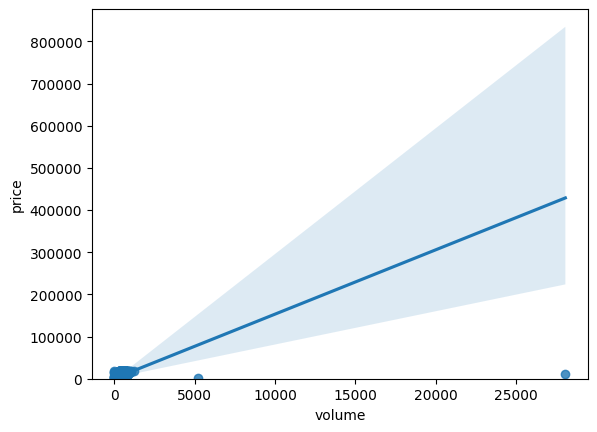

In [ ]:
corr_var(df["volume"])

Le ocoefficient de corrélation de Pearson est  0.9215913011934769 avec une p-valeur  0.0


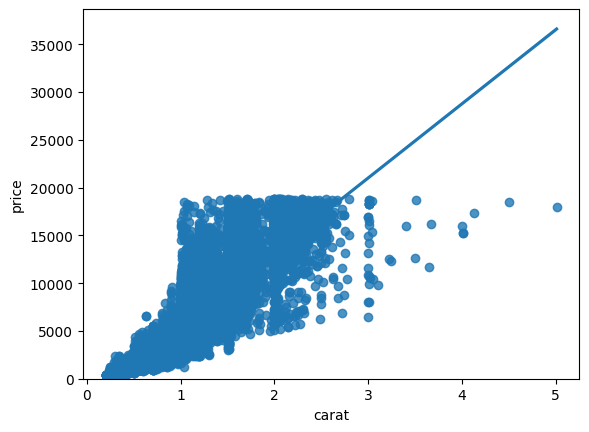

In [ ]:
corr_var(df["carat"])

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\function_base.py:169: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1650: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4893: RuntimeWarning: invalid value encountered in subtract
  xm = x - xmean


Le ocoefficient de corrélation de Pearson est  nan avec une p-valeur  nan


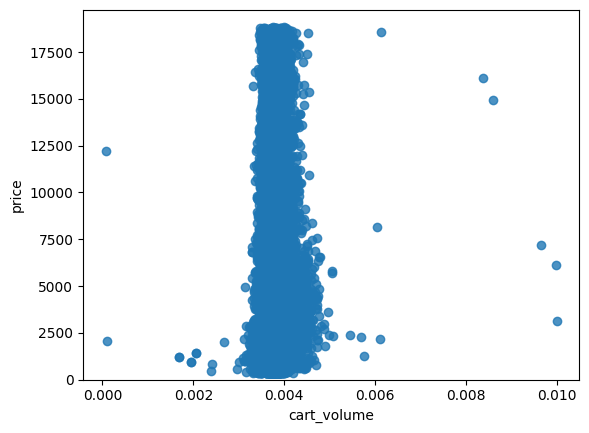

In [ ]:
corr_var(df["cart_volume"])

Le ocoefficient de corrélation de Pearson est  -0.010647404584142983 avec une p-valeur  0.013403249012606052


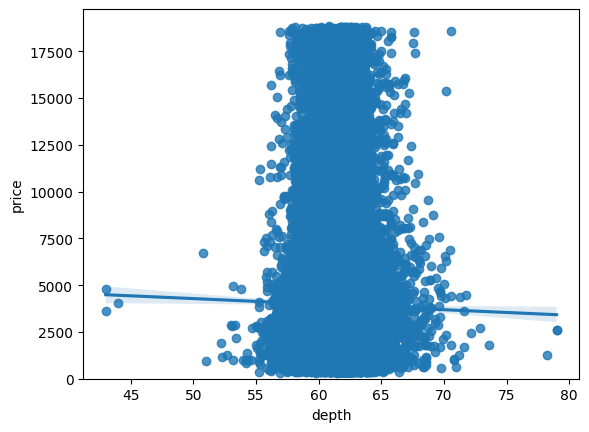

In [ ]:
corr_var(df["depth"])

<Axes: >

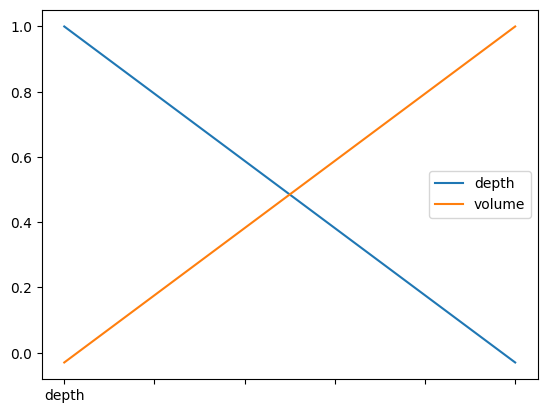

In [ ]:
df[["depth", "volume"]].corr().plot()

Nettoyage des outliers

In [79]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [88]:
def iqr_outliers(feature, threshold = 1.5):
    feature = df["feature"]
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df.query("feature< @lower_bound| feature> @upper_bound")

    return outliers

In [86]:
feature = df["mpg"]

In [ ]:
q1 = feature.quantile(0.25)
q3 = feature.quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df.query("mpg < @lower_bound| mpg> @upper_bound")

Méthode LOF

In [58]:
from sklearn.neighbors import LocalOutlierFactor

Load data

In [92]:
np.random.seed=0
m = 100
X = np.random.randn(m).reshape(-1,1)

y=3*X-2+np.random.randn(m).reshape(-1,1)

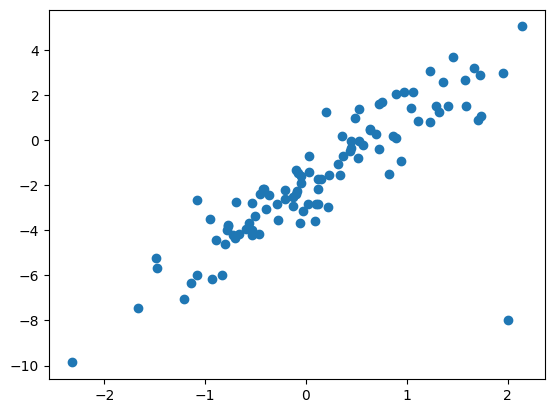

In [60]:
X = np.concatenate((X, [[2]]), axis=0)
y = np.concatenate((y,[[-8]]), axis=0)

plt.scatter(X,y)

#methode IQR

Text(0.5, 1.0, 'X')

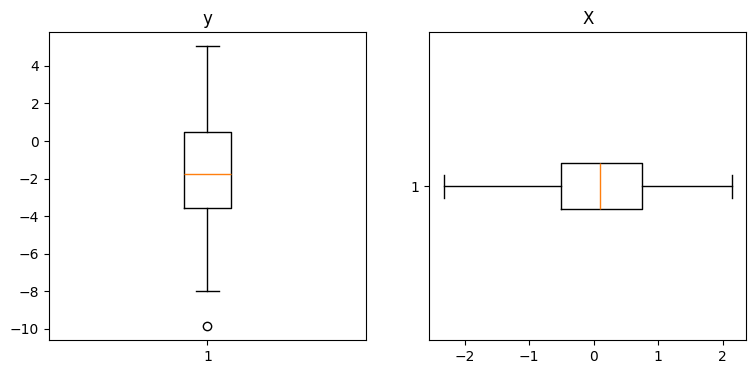

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].boxplot(y)
ax[0].set_title("y")
ax[1].boxplot(X, vert=False)
ax[1].set_title("X")

#Detection Outliers

In [ ]:
q1 = feature.quantile(0.25)
q3 = feature.quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df.query("mpg < @lower_bound| mpg> @upper_bound")

In [98]:
X = np.concatenate((X, [[2]]), axis=0)
y = np.concatenate((y,[[-8]]), axis=0)

In [99]:
data = np.concatenate((X, y),axis=1)

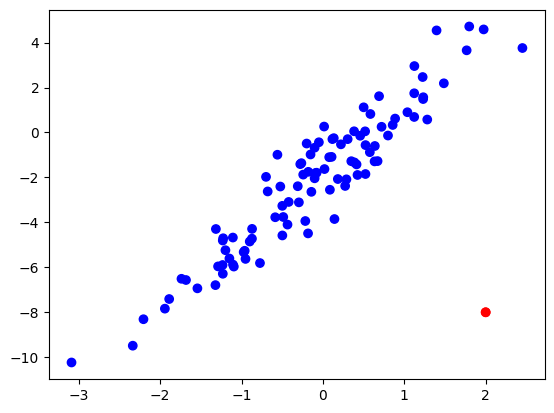

In [100]:
detection_model1 = LocalOutlierFactor(contamination=0.01, n_neighbors=5)
detection_model1.fit_predict(data)

outliers = detection_model1.fit_predict(data)

plt.scatter(X, y, c=outliers, cmap = "bwr_r")
